# Predict the employee attrition rate in organizations

## Problem statement

Employees are the most important part of an organization. Successful employees meet deadlines, make sales, and build the brand through positive customer interactions.

Employee attrition is a major cost to an organization and predicting such attritions is the most important requirement of the Human Resources department in many organizations. In this problem, your task is to predict the attrition rate of employees of an organization. 

## Data

Train.csv
Test.csv

sample_submission.csv

## Variable Description
|Column Name | Description|
|Employee_ID | Unique ID of each employee|
|Age | Age of each employee|
|Unit | Department under which the employee work|
|Education | Rating of Qualification of an employee (1-5)|
|Gender | Male-0 or Female-1|
|Decision_skill_possess | Decision skill that an employee possesses|
|Post_Level | Level of the post in an organization (1-5)|
|Relationship_Status | Categorical Married or Single |
|Pay_Scale | Rate in between 1 to 10|
|Time_of_service | Years in the organization|
|growth_rate | Growth rate in percentage of an employee|
|Time_since_promotion | Time in years since the last promotion|
|Work_Life_balance | Rating for work-life balance given by an employee.|
|Travel_Rate | Rating based on travel history(1-3)|
|Hometown | Name of the city|
|Compensation_and_Benefits | Categorical Variabe|
|VAR1 - VAR5 | Anominised variables|
|Attrition_rate(TARGET VARIABLE) | Attrition rate of each employee|
|Submission format|


You are required to write your predictions in a .csv file that contain the following columns:

Employee_ID

Attrition_rate

## Evaluation criteria

The evaluation metric that is used for this problem is the root mean squared error. The formula is as follows:



In [82]:
import pandas as pd
import numpy as np
pd.set_option('max_columns',None)

In [83]:
df_train = pd.read_csv("Dataset/Train.csv")
df_test = pd.read_csv("Dataset/Test.csv")
df_train.head()

Employee_ID Gender   Age  Education_Level Relationship_Status     Hometown  \
0   EID_23371      F  42.0                4             Married     Franklin   
1   EID_18000      M  24.0                3              Single  Springfield   
2    EID_3891      F  58.0                3             Married      Clinton   
3   EID_17492      F  26.0                3              Single      Lebanon   
4   EID_22534      F  31.0                1             Married  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   

   Time_since_promotion  growth_rate  Travel_Rate  Post_Level  Pay_Scale  \
0                     4           33            1           1        7.0   
1                     4           36            0           3        6.0   
2                     3           51            0           2        8.0   
3                     3           56            1           3        8.0   
4                     4           62            1           3        2.0   

  Compensation_and_Benefits  Work_Life_balance  VAR1    VAR2    VAR3  VAR4  \
0                     type2                3.0     4  0.7516  1.8688   2.0   
1                     type2                4.0     3 -0.9612 -0.4537   2.0   
2                     type2                1.0     4 -0.9612 -0.4537   3.0   
3                     type2                1.0     3 -1.8176 -0.4537   NaN   
4                     type3                3.0     1  0.7516 -0.4537   2.0   

   VAR5  VAR6  VAR7  Attrition_rate  
0     4     5     3          0.1841  
1     3     5     3          0.0670  
2     3     8     3          0.0851  
3     3     7     3          0.0668  
4     2     8     2          0.1827

## Dataset Infomation

In [84]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
Employee_ID                  7000 non-null object
Gender                       7000 non-null object
Age                          6588 non-null float64
Education_Level              7000 non-null int64
Relationship_Status          7000 non-null object
Hometown                     7000 non-null object
Unit                         7000 non-null object
Decision_skill_possess       7000 non-null object
Time_of_service              6856 non-null float64
Time_since_promotion         7000 non-null int64
growth_rate                  7000 non-null int64
Travel_Rate                  7000 non-null int64
Post_Level                   7000 non-null int64
Pay_Scale                    6991 non-null float64
Compensation_and_Benefits    7000 non-null object
Work_Life_balance            6989 non-null float64
VAR1                         7000 non-null int64
VAR2                         6423 non-null fl

## Features - Data Types

In [49]:
ordinal_features = ['Education_Level','Post_Level','Travel_Rate','Pay_Scale','Work_Life_balance']
nominal_features = df_train.select_dtypes('object').columns
numerical_features = df_train.select_dtypes(['int64','float64']).columns
print('Ordinal Features ({}) --> {}'.format(len(ordinal_features),ordinal_features))
print('Nominal Features ({}) --> {}'.format(len(nominal_features),nominal_features))

Ordinal Features (5) --> ['Education_Level', 'Post_Level', 'Travel_Rate', 'Pay_Scale', 'Work_Life_balance']
Nominal Features (7) --> Index(['Employee_ID', 'Gender', 'Relationship_Status', 'Hometown', 'Unit',
       'Decision_skill_possess', 'Compensation_and_Benefits'],
      dtype='object')


In [50]:
# Ordinal features
for col in ordinal_features:
    df_train[col] = df_train[col].astype('str')

In [51]:
print('Numerical Features ({}) --> {}'.format(len(numerical_features),numerical_features))

Numerical Features (17) --> Index(['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion',
       'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')


## Descriptive Stats

In [52]:
df_train.describe().T

count       mean        std      min      25%  \
Age                   6588.0  39.622799  13.606920  19.0000  27.0000   
Time_of_service       6856.0  13.385064  10.364188   0.0000   5.0000   
Time_since_promotion  7000.0   2.367143   1.149395   0.0000   1.0000   
growth_rate           7000.0  47.064286  15.761406  20.0000  33.0000   
VAR1                  7000.0   3.098571   0.836377   1.0000   3.0000   
VAR2                  6423.0  -0.008126   0.989850  -1.8176  -0.9612   
VAR3                  7000.0  -0.013606   0.986933  -2.7762  -0.4537   
VAR4                  6344.0   1.891078   0.529403   1.0000   2.0000   
VAR5                  7000.0   2.834143   0.938945   1.0000   2.0000   
VAR6                  7000.0   7.101286   1.164262   5.0000   6.0000   
VAR7                  7000.0   3.257000   0.925319   1.0000   3.0000   
Attrition_rate        7000.0   0.189376   0.185753   0.0000   0.0704   

                           50%      75%      max  
Age                   37.00000  52.0000  65.0000  
Time_of_service       10.00000  21.0000  43.0000  
Time_since_promotion   2.00000   3.0000   4.0000  
growth_rate           47.00000  61.0000  74.0000  
VAR1                   3.00000   3.0000   5.0000  
VAR2                  -0.10480   0.7516   1.6081  
VAR3                  -0.45370   0.7075   1.8688  
VAR4                   2.00000   2.0000   3.0000  
VAR5                   3.00000   3.0000   5.0000  
VAR6                   7.00000   8.0000   9.0000  
VAR7                   3.00000   4.0000   5.0000  
Attrition_rate         0.14265   0.2350   0.9959

## Missing Data Visualization

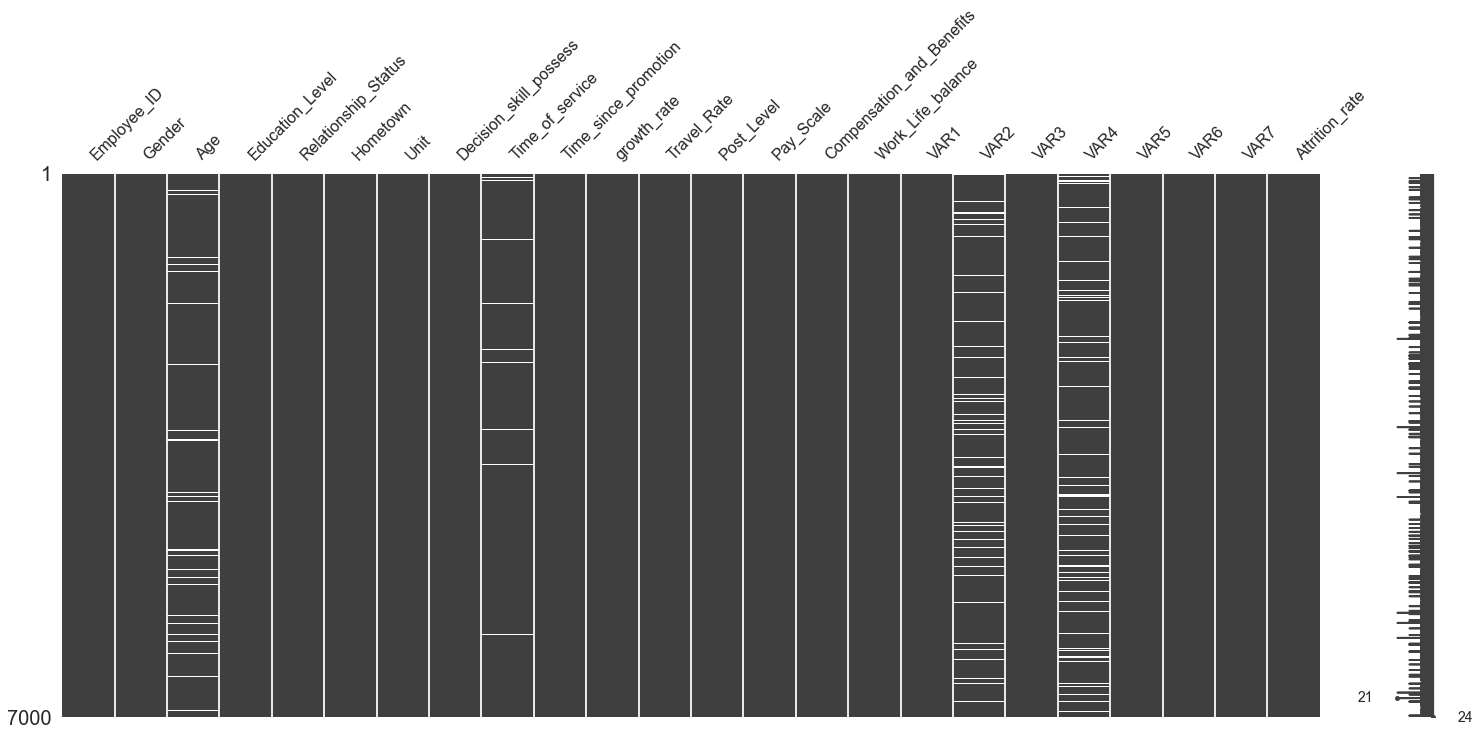

In [53]:
import missingno as msno
msno.matrix(df_train)

In [54]:
print("Shape train: %s, test: %s" % (df_train.shape, df_test.shape))

Shape train: (7000, 24), test: (3000, 23)


In [55]:
df_na = (df_train.isnull().sum() / len(df_train)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(10)

Missing Ratio
VAR4                  9.371429
VAR2                  8.242857
Age                   5.885714
Time_of_service       2.057143

## Data Imputation

In [56]:
# # for categorical features impute with a new category unknown
# for col in df.select_dtypes('object').columns:
#     df[col] = df[col].fillna('unknown')

# # for numerical cols impute with mean
# for col in df.select_dtypes(['int64','float64']).columns:
#     df[col] = df[col].fillna(df[col].mean())

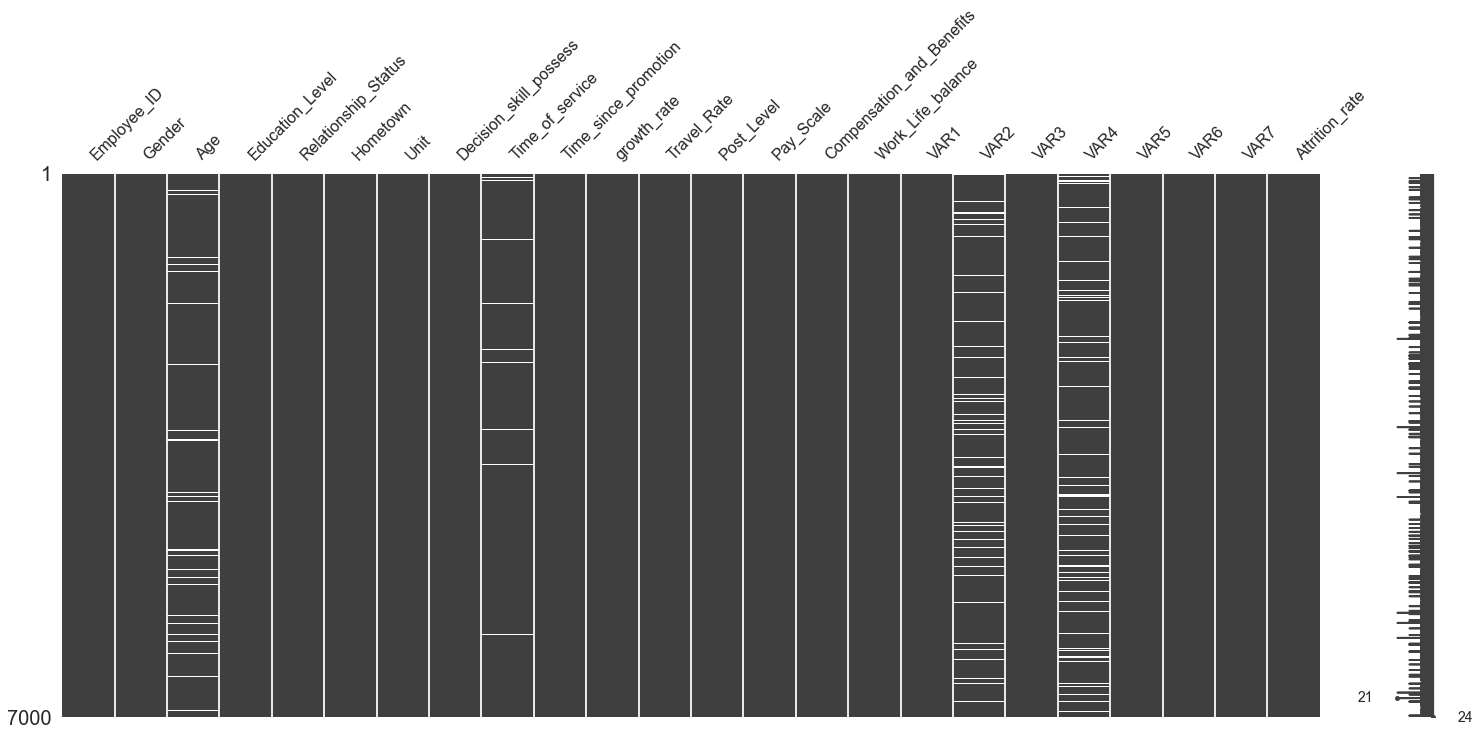

In [57]:
msno.matrix(df_train)

In [12]:
# !pip install pandas-profiling
# !pip3 install pandas-profiling

# Identifying outliers with the 1.5xIQR rule
* Lower Outlier = Q1 −1.5⋅IQR
* Higher Outlier = Q3+1.5.IQR

In [13]:
from pandas_profiling import ProfileReport

In [14]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [15]:
profile

In [162]:
df_train = pd.read_csv("Dataset/Train.csv")
df_test = pd.read_csv("Dataset/Test.csv")
df_train.head()

Employee_ID Gender   Age  Education_Level Relationship_Status     Hometown  \
0   EID_23371      F  42.0                4             Married     Franklin   
1   EID_18000      M  24.0                3              Single  Springfield   
2    EID_3891      F  58.0                3             Married      Clinton   
3   EID_17492      F  26.0                3              Single      Lebanon   
4   EID_22534      F  31.0                1             Married  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   

   Time_since_promotion  growth_rate  Travel_Rate  Post_Level  Pay_Scale  \
0                     4           33            1           1        7.0   
1                     4           36            0           3        6.0   
2                     3           51            0           2        8.0   
3                     3           56            1           3        8.0   
4                     4           62            1           3        2.0   

  Compensation_and_Benefits  Work_Life_balance  VAR1    VAR2    VAR3  VAR4  \
0                     type2                3.0     4  0.7516  1.8688   2.0   
1                     type2                4.0     3 -0.9612 -0.4537   2.0   
2                     type2                1.0     4 -0.9612 -0.4537   3.0   
3                     type2                1.0     3 -1.8176 -0.4537   NaN   
4                     type3                3.0     1  0.7516 -0.4537   2.0   

   VAR5  VAR6  VAR7  Attrition_rate  
0     4     5     3          0.1841  
1     3     5     3          0.0670  
2     3     8     3          0.0851  
3     3     7     3          0.0668  
4     2     8     2          0.1827

In [90]:
df_train.head()

Employee_ID Gender   Age  Education_Level Relationship_Status     Hometown  \
0   EID_23371      F  42.0                4             Married     Franklin   
1   EID_18000      M  24.0                3              Single  Springfield   
2    EID_3891      F  58.0                3             Married      Clinton   
3   EID_17492      F  26.0                3              Single      Lebanon   
4   EID_22534      F  31.0                1             Married  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   

   Time_since_promotion  growth_rate  Travel_Rate  Post_Level  Pay_Scale  \
0                     4           33            1           1        7.0   
1                     4           36            0           3        6.0   
2                     3           51            0           2        8.0   
3                     3           56            1           3        8.0   
4                     4           62            1           3        2.0   

  Compensation_and_Benefits  Work_Life_balance  VAR1    VAR2    VAR3  VAR4  \
0                     type2                3.0     4  0.7516  1.8688   2.0   
1                     type2                4.0     3 -0.9612 -0.4537   2.0   
2                     type2                1.0     4 -0.9612 -0.4537   3.0   
3                     type2                1.0     3 -1.8176 -0.4537   NaN   
4                     type3                3.0     1  0.7516 -0.4537   2.0   

   VAR5  VAR6  VAR7  Attrition_rate  
0     4     5     3          0.1841  
1     3     5     3          0.0670  
2     3     8     3          0.0851  
3     3     7     3          0.0668  
4     2     8     2          0.1827

In [163]:
for col in df_train.select_dtypes('object').columns:
    df_train[col] = df_train[col].astype('category')

In [164]:
cols_to_impute = df_train.columns[df_train.isna().any()].tolist()
cols_to_impute

['Age', 'Time_of_service', 'Pay_Scale', 'Work_Life_balance', 'VAR2', 'VAR4']

In [165]:
from sklearn.impute import IterativeImputer
imp = IterativeImputer()

In [166]:
imputed_df = pd.DataFrame(imp.fit_transform(df_train[cols_to_impute]),columns=cols_to_impute)
df_train.drop(cols_to_impute,axis=1,inplace=True)
df_train = pd.concat([df_train,imputed_df],axis=1)
df_train.head(1)

Employee_ID Gender  Education_Level Relationship_Status  Hometown Unit  \
0   EID_23371      F                4             Married  Franklin   IT   

  Decision_skill_possess  Time_since_promotion  growth_rate  Travel_Rate  \
0             Conceptual                     4           33            1   

   Post_Level Compensation_and_Benefits  VAR1    VAR3  VAR5  VAR6  VAR7  \
0           1                     type2     4  1.8688     4     5     3   

   Attrition_rate   Age  Time_of_service  Pay_Scale  Work_Life_balance  \
0          0.1841  42.0              4.0        7.0                3.0   

     VAR2  VAR4  
0  0.7516   2.0

In [167]:
imputed_test_df = pd.DataFrame(imp.transform(df_test[cols_to_impute]),columns=cols_to_impute)
df_test.drop(cols_to_impute,axis=1,inplace=True)
df_test = pd.concat([df_test,imputed_test_df],axis=1)

In [125]:
df_test.head(1)

Employee_ID Gender  Education_Level Relationship_Status     Hometown Unit  \
0   EID_22713      F                5              Single  Springfield  R&D   

  Decision_skill_possess  Time_since_promotion  growth_rate  Travel_Rate  \
0             Conceptual                     4           30            1   

   Post_Level Compensation_and_Benefits  VAR1    VAR3  VAR5  VAR6  VAR7   Age  \
0           5                     type2     3 -0.4537     1     8     4  32.0   

   Time_of_service  Pay_Scale  Work_Life_balance    VAR2  VAR4  
0              7.0        4.0                1.0 -0.9612   2.0

### Normalize Numerical Features

In [168]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [169]:
numerical_cols = df_train.select_dtypes(['int64','float64']).columns.tolist()
numerical_cols.remove('Attrition_rate')
numerical_cols

['Education_Level',
 'Time_since_promotion',
 'growth_rate',
 'Travel_Rate',
 'Post_Level',
 'VAR1',
 'VAR3',
 'VAR5',
 'VAR6',
 'VAR7',
 'Age',
 'Time_of_service',
 'Pay_Scale',
 'Work_Life_balance',
 'VAR2',
 'VAR4']

In [170]:
scaled_df = pd.DataFrame(ss.fit_transform(df_train[numerical_cols]),columns=numerical_cols)
df_train.drop(numerical_cols,axis=1,inplace=True)
df_train = pd.concat([df_train,scaled_df],axis=1)

In [123]:
df_train.head(1)

Employee_ID Gender Relationship_Status  Hometown Unit  \
0   EID_23371      F             Married  Franklin   IT   

  Decision_skill_possess Compensation_and_Benefits  Education_Level  \
0             Conceptual                     type2         0.762557   

   Time_since_promotion  growth_rate  Travel_Rate  Post_Level      VAR1  \
0              1.420724    -0.892388     0.281016   -1.545154  1.077855   

       VAR3      VAR5      VAR6      VAR7  Attrition_rate       Age  \
0  1.907466  1.241756 -1.804951 -0.277762       -0.028406  0.176945   

   Time_of_service  Pay_Scale  Work_Life_balance      VAR2      VAR4  
0        -0.910659   0.483098           0.545636  0.801312  0.216146

In [171]:
scaled_test_df = pd.DataFrame(ss.transform(df_test[numerical_cols]),columns=numerical_cols)
df_test.drop(numerical_cols,axis=1,inplace=True)
df_test = pd.concat([df_test,scaled_test_df],axis=1)
df_test.head()

Employee_ID Gender Relationship_Status     Hometown       Unit  \
0   EID_22713      F              Single  Springfield        R&D   
1    EID_9658      M              Single      Lebanon         IT   
2   EID_22203      M             Married  Springfield      Sales   
3    EID_7652      M              Single   Washington  Marketing   
4    EID_6516      F             Married     Franklin        R&D   

  Decision_skill_possess Compensation_and_Benefits  Education_Level  \
0             Conceptual                     type2         1.701500   
1              Directive                     type2        -1.115331   
2              Directive                     type3        -0.176387   
3             Analytical                     type0         1.701500   
4             Conceptual                     type2        -0.176387   

   Time_since_promotion  growth_rate  Travel_Rate  Post_Level      VAR1  \
0              1.420724    -1.082740     0.281016    1.892341 -0.117864   
1             -0.319445     1.582187     0.281016   -1.545154  1.077855   
2              0.550639    -1.399993    -1.261816   -1.545154  1.077855   
3              1.420724    -1.209641     0.281016   -1.545154 -0.117864   
4              1.420724    -0.004079     0.281016    0.173594  1.077855   

       VAR3      VAR5      VAR6      VAR7       Age  Time_of_service  \
0 -0.445952 -1.953548  0.771973  0.803023 -0.562326        -0.620522   
1  0.730706 -0.888447  0.771973 -1.358547  1.877270         2.667702   
2  0.730706 -1.953548  1.630947 -0.277762  0.916217         0.733453   
3  0.730706 -0.888447  0.771973 -0.277762  0.768363        -0.233672   
4  0.730706 -0.888447 -0.087002  0.803023  0.324800        -0.136960   

   Pay_Scale  Work_Life_balance      VAR2      VAR4  
0  -0.975361          -1.237176 -1.005243  0.216146  
1  -2.433821          -1.237176 -1.005243 -1.768187  
2   0.969252          -1.237176 -0.101965  0.216146  
3  -1.947668           1.437042 -0.101965  0.216146  
4  -1.947668           1.437042  1.704695  0.216146

## Target analysis

In [140]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, cross_val_predict

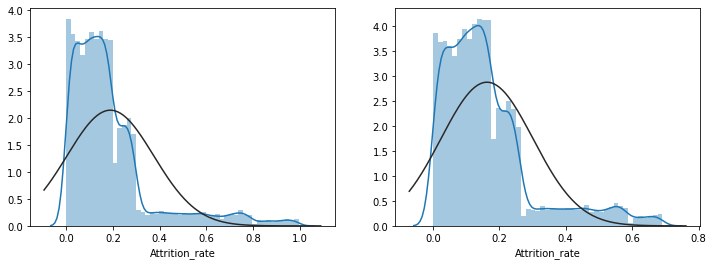

In [142]:
fig, ax = plt.subplots(1,2)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sns.distplot(df_train.Attrition_rate, ax=ax[0], fit=norm)
sns.distplot(np.log(df_train.Attrition_rate+1), ax=ax[1], fit= norm)

In [86]:
df_train.head(1)

Employee_ID Gender   Age  Education_Level Relationship_Status  Hometown  \
0   EID_23371      F  42.0                4             Married  Franklin   

  Unit Decision_skill_possess  Time_of_service  Time_since_promotion  \
0   IT             Conceptual              4.0                     4   

   growth_rate  Travel_Rate  Post_Level  Pay_Scale Compensation_and_Benefits  \
0           33            1           1        7.0                     type2   

   Work_Life_balance  VAR1    VAR2    VAR3  VAR4  VAR5  VAR6  VAR7  \
0                3.0     4  0.7516  1.8688   2.0     4     5     3   

   Attrition_rate  
0          0.1841

In [4]:
# Reference: https://www.kaggle.com/lasmith/house-price-regression-with-lightgbm

def impute_cat_data(df, cols):
    """ Fill with the supplied val """
    for col in cols:
        df[col] = df[col].fillna('Unknown')
    return df

def fill_missing_with_mode(df, cols):
    """ Fill with the mode """
    for col in cols:
        df[col] = df[col].fillna(df[col].mode()[0])
        
def addlogs(res, cols):
    """ Log transform feature list"""
    m = res.shape[1]
    for c in cols:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[c])).values)   
        res.columns.values[m] = c + '_log'
        m += 1
    return res

def addlog1p(df,cols):
    for col in cols:
        df['{}_log1p'.format(col)] = np.log1p(df[col])
    return df

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [6]:
float_cols = ['Age', 'Time_of_service', 'VAR2', 'VAR3', 'VAR4']
# df_train.select_dtypes('float').columns.tolist()
int_cols = df_train.select_dtypes('int').columns.tolist()
cat_cols = df_train.select_dtypes('object').columns.tolist()

In [111]:
float_cols

['Age', 'Time_of_service', 'VAR2', 'VAR3', 'VAR4', 'Attrition_rate']

In [7]:
int_imp = IterativeImputer(initial_strategy='most_frequent',random_state=4)
float_imp = IterativeImputer(random_state=5)
# cat_imp = IterativeImputer(initial_strategy='constant',random_state=2)

In [93]:
cat_cols

['Employee_ID',
 'Gender',
 'Education_Level',
 'Relationship_Status',
 'Hometown',
 'Unit',
 'Decision_skill_possess',
 'Travel_Rate',
 'Post_Level',
 'Pay_Scale',
 'Compensation_and_Benefits',
 'Work_Life_balance']

In [23]:
df_train = pd.read_csv("Dataset/Train.csv")
df_test = pd.read_csv("Dataset/Test.csv")

In [24]:
df_train_imputed_float = pd.DataFrame(float_imp.fit_transform(df_train[float_cols]),columns=float_cols)
df_train_imputed_int = pd.DataFrame(int_imp.fit_transform(df_train[int_cols]),columns=int_cols)
# df_train_imputed_cat = pd.DataFrame(cat_imp.fit_transform(df_train[cat_cols]),columns=cat_cols)
df_train_imputed_cat = impute_cat_data(df_train[cat_cols],cat_cols)

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
df_test_imputed_float = pd.DataFrame(float_imp.fit_transform(df_test[float_cols]),columns=float_cols)
df_test_imputed_int = pd.DataFrame(int_imp.fit_transform(df_test[int_cols]),columns=int_cols)
# df_train_imputed_cat = pd.DataFrame(cat_imp.fit_transform(df_train[cat_cols]),columns=cat_cols)
df_test_imputed_cat = impute_cat_data(df_test[cat_cols],cat_cols)

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


###  Add Log transform columns for simple integer features.

In [11]:
# transform integer and float columns
df_train_imputed_int_trans = addlogs(df_train_imputed_int,int_cols)
df_train_imputed_float_trans = addlog1p(df_train_imputed_float,float_cols)

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
df_test = addlogs(df_test_imputed_int,int_cols)
df_test = addlog1p(df_test_imputed_float,float_cols)

In [13]:
df_train_imputed_float.head(2)

Age  Time_of_service    VAR2    VAR3  VAR4  Age_log1p  \
0  42.0              4.0  0.7516  1.8688   2.0   3.761200   
1  24.0              5.0 -0.9612 -0.4537   2.0   3.218876   

   Time_of_service_log1p  VAR2_log1p  VAR3_log1p  VAR4_log1p  
0               1.609438    0.560530    1.053894    1.098612  
1               1.791759   -3.249335   -0.604587    1.098612

In [14]:
df_test_imputed_float.head(2)

Age  Time_of_service    VAR2    VAR3  VAR4  Age_log1p  \
0  32.0              7.0 -0.9612 -0.4537   2.0   3.496508   
1  65.0             41.0 -0.9612  0.7075   1.0   4.189655   

   Time_of_service_log1p  VAR2_log1p  VAR3_log1p  VAR4_log1p  
0               2.079442   -3.249335   -0.604587    1.098612  
1               3.737670   -3.249335    0.535030    0.693147

In [29]:
df_train_final = pd.concat([df_train_imputed_float,df_train_imputed_int,df_train_imputed_cat],axis=1)

In [33]:
df_test_final = pd.concat([df_test_imputed_float,df_test_imputed_int,df_test_imputed_cat],axis=1)

In [34]:
df_test_final.shape

(3000, 21)

In [32]:
df_train_final.shape

(7000, 21)

In [ ]:
# def dummy_encode(in_df_train, in_df_test):
#     df_train = in_df_train
#     df_test = in_df_test
#     categorical_feats = [
#         f for f in df_train.columns if df_train[f].dtype == 'object'
#     ]
#     print(categorical_feats)
#     for f_ in categorical_feats:
#         prefix = f_
#         df_train = pd.concat([df_train, pd.get_dummies(df_train[f_], prefix=prefix)], axis=1).drop(f_, axis=1)
#         df_test = pd.concat([df_test, pd.get_dummies(df_test[f_], prefix=prefix)], axis=1).drop(f_, axis=1)
#         df_test = fix_missing_cols(df_train, df_test)
#     return df_train, df_test

# df_train, df_test = dummy_encode(df_train, df_test)

In [36]:
df_train.head(1)

Employee_ID Gender   Age  Education_Level Relationship_Status  Hometown  \
0   EID_23371      F  42.0                4             Married  Franklin   

  Unit Decision_skill_possess  Time_of_service  Time_since_promotion  \
0   IT             Conceptual              4.0                     4   

   growth_rate  Travel_Rate  Post_Level  Pay_Scale Compensation_and_Benefits  \
0           33            1           1        7.0                     type2   

   Work_Life_balance  VAR1    VAR2    VAR3  VAR4  VAR5  VAR6  VAR7  \
0                3.0     4  0.7516  1.8688   2.0     4     5     3   

   Attrition_rate  Attrition_rate_log1p  
0          0.1841              0.168983

In [74]:
for col in df_test_final.select_dtypes('object').columns:
    df_test_final[col] = df_test_final[col].astype('category')

df_test_final.drop('Employee_ID',axis=1,inplace=True)

In [55]:
for col in df_train_final.select_dtypes('object').columns:
    df_train_final[col] = df_train_final[col].astype('category')

df_train_final.drop('Employee_ID',axis=1,inplace=True)

In [172]:
df_train = addlog1p(df_train,['Attrition_rate'])
# y = df_train.Attrition_rate_log1p
# y.sample(3)

5999    0.215837
3039    0.099664
362     0.040374
Name: Attrition_rate_log1p, dtype: float64

In [143]:
df_train.head(1)

Employee_ID Gender Relationship_Status  Hometown Unit  \
0   EID_23371      F             Married  Franklin   IT   

  Decision_skill_possess Compensation_and_Benefits  Attrition_rate  \
0             Conceptual                     type2          0.1841   

   Education_Level  Time_since_promotion  growth_rate  Travel_Rate  \
0         0.762557              1.420724    -0.892388     0.281016   

   Post_Level      VAR1      VAR3      VAR5      VAR6      VAR7       Age  \
0   -1.545154  1.077855  1.907466  1.241756 -1.804951 -0.277762  0.176945   

   Time_of_service  Pay_Scale  Work_Life_balance      VAR2      VAR4  
0        -0.910659   0.483098           0.545636  0.801312  0.216146

In [173]:
y = df_train.Attrition_rate_log1p
X = df_train.drop(['Employee_ID',"Attrition_rate","Attrition_rate_log1p"], axis=1)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
print('Training dataset size :: {}'.format(X_train.shape))
print('Validation dataset size :: {}'.format(X_test.shape))

Training dataset size :: (5600, 22)
Validation dataset size :: (1400, 22)


In [47]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
    
}

In [42]:
gbm = lgb.LGBMRegressor(**hyper_params)

In [178]:
fit_params = {"early_stopping_rounds": 100000,
                  "eval_metric": 'rmse',
                  "eval_set": [(X_test, y_test)],
                  'eval_names': ['valid'],
                  'verbose': 1,
                  'feature_name': 'auto',
                  'categorical_feature': 'auto'
                  }

reg = lgb.LGBMRegressor(boosting_type='gbdt',
                             num_leaves=100,
                             random_state=314,
                             silent=False,
                             metric='rmse',
                             n_jobs=-1,
                             n_estimators=1000,
                             colsample_bytree=0.85,
                             subsample=0.9,
                             learning_rate=0.001)

In [179]:
reg.fit(X_train, y_train, **fit_params)

[1]	valid's rmse: 0.138776
Training until validation scores don't improve for 100000 rounds
[2]	valid's rmse: 0.138775
[3]	valid's rmse: 0.138775
[4]	valid's rmse: 0.138775
[5]	valid's rmse: 0.138774
[6]	valid's rmse: 0.138775
[7]	valid's rmse: 0.138773
[8]	valid's rmse: 0.138772
[9]	valid's rmse: 0.138772
[10]	valid's rmse: 0.138773
[11]	valid's rmse: 0.138773
[12]	valid's rmse: 0.138774
[13]	valid's rmse: 0.138771
[14]	valid's rmse: 0.138772
[15]	valid's rmse: 0.138772
[16]	valid's rmse: 0.138772
[17]	valid's rmse: 0.138771
[18]	valid's rmse: 0.138772
[19]	valid's rmse: 0.138771
[20]	valid's rmse: 0.138772
[21]	valid's rmse: 0.138771
[22]	valid's rmse: 0.138772
[23]	valid's rmse: 0.138772
[24]	valid's rmse: 0.138773
[25]	valid's rmse: 0.138772
[26]	valid's rmse: 0.138772
[27]	valid's rmse: 0.138771
[28]	valid's rmse: 0.138772
[29]	valid's rmse: 0.138771
[30]	valid's rmse: 0.138771
[31]	valid's rmse: 0.138772
[32]	valid's rmse: 0.138771
[33]	valid's rmse: 0.13877
[34]	valid's rmse: 0.

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.85,
              importance_type='split', learning_rate=0.001, max_depth=-1,
              metric='rmse', min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=1000, n_jobs=-1, num_leaves=100,
              objective=None, random_state=314, reg_alpha=0.0, reg_lambda=0.0,
              silent=False, subsample=0.9, subsample_for_bin=200000,
              subsample_freq=0)

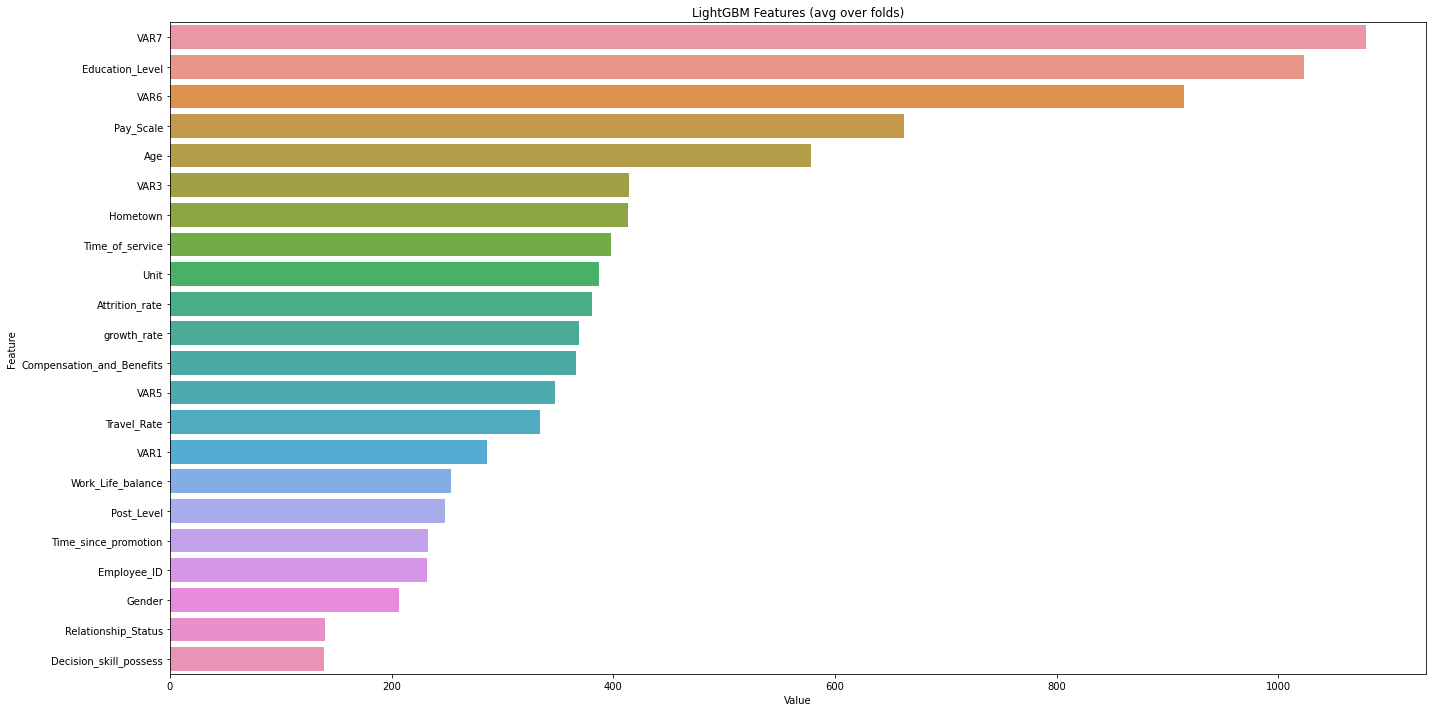

<Figure size 432x288 with 0 Axes>

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(reg.feature_importances_,df_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [206]:
y_pred = np.expm1(reg.predict(X_train, num_iteration=gbm.best_iteration_))

In [182]:
# Basic RMSE
print('The rmse of prediction is:', round(mean_squared_log_error(y_pred, y_train) ** 0.5, 5))

The rmse of prediction is: 0.10958


In [212]:
print('The Score of prediction is:',100*np.maximum(0,1-mean_squared_log_error(y_pred, y_train)))

The Score of prediction is: 98.77344883746503


In [79]:
y_test_pred = reg.predict(df_test_final, num_iteration=reg.best_iteration_)

In [185]:
df_test.head()

Employee_ID Gender Relationship_Status     Hometown       Unit  \
0   EID_22713      F              Single  Springfield        R&D   
1    EID_9658      M              Single      Lebanon         IT   
2   EID_22203      M             Married  Springfield      Sales   
3    EID_7652      M              Single   Washington  Marketing   
4    EID_6516      F             Married     Franklin        R&D   

  Decision_skill_possess Compensation_and_Benefits  Education_Level  \
0             Conceptual                     type2         1.701500   
1              Directive                     type2        -1.115331   
2              Directive                     type3        -0.176387   
3             Analytical                     type0         1.701500   
4             Conceptual                     type2        -0.176387   

   Time_since_promotion  growth_rate  Travel_Rate  Post_Level      VAR1  \
0              1.420724    -1.082740     0.281016    1.892341 -0.117864   
1             -0.319445     1.582187     0.281016   -1.545154  1.077855   
2              0.550639    -1.399993    -1.261816   -1.545154  1.077855   
3              1.420724    -1.209641     0.281016   -1.545154 -0.117864   
4              1.420724    -0.004079     0.281016    0.173594  1.077855   

       VAR3      VAR5      VAR6      VAR7       Age  Time_of_service  \
0 -0.445952 -1.953548  0.771973  0.803023 -0.562326        -0.620522   
1  0.730706 -0.888447  0.771973 -1.358547  1.877270         2.667702   
2  0.730706 -1.953548  1.630947 -0.277762  0.916217         0.733453   
3  0.730706 -0.888447  0.771973 -0.277762  0.768363        -0.233672   
4  0.730706 -0.888447 -0.087002  0.803023  0.324800        -0.136960   

   Pay_Scale  Work_Life_balance      VAR2      VAR4  
0  -0.975361          -1.237176 -1.005243  0.216146  
1  -2.433821          -1.237176 -1.005243 -1.768187  
2   0.969252          -1.237176 -0.101965  0.216146  
3  -1.947668           1.437042 -0.101965  0.216146  
4  -1.947668           1.437042  1.704695  0.216146

In [186]:
df_test.shape

(3000, 23)

In [187]:
df_train.shape

(7000, 25)

In [192]:
for col in df_test.select_dtypes('object').columns:
    df_test[col] = df_test[col].astype('category')

In [193]:
test_pred = np.expm1(reg.predict(df_test.drop('Employee_ID',axis=1), num_iteration=gbm.best_iteration_))

In [196]:
df_test["Attrition_rate"] = test_pred
df_test.to_csv("results1.csv", columns=["Employee_ID", "Attrition_rate"], index=False)

In [201]:
round(111.17992)

111

In [205]:
round(81.57992+30)

112

In [200]:
pd.read_csv('results1.csv').head()

Employee_ID  Attrition_rate
0   EID_22713        0.178914
1    EID_9658        0.176294
2   EID_22203        0.176083
3    EID_7652        0.173153
4    EID_6516        0.177158

In [46]:
pd.read_csv('Dataset/sample_submission.csv')

Employee_ID  Attrition_rate
0       TID_1          0.1588
1       TID_2          0.1424
2       TID_3          0.4758
3       TID_4          0.0846
4       TID_5          0.2388

In [221]:
h2o_res = pd.read_csv('/Users/naga/Downloads/ea5400da2978.csv')

In [223]:
h2o_res.head(1)

predict Employee_ID Gender   Age  Education_Level Relationship_Status  \
0  0.195759   EID_22713      F  32.0                5              Single   

      Hometown Unit Decision_skill_possess  Time_of_service  \
0  Springfield  R&D             Conceptual              7.0   

   Time_since_promotion  growth_rate  Travel_Rate  Post_Level  Pay_Scale  \
0                     4           30            1           5        4.0   

  Compensation_and_Benefits  Work_Life_balance  VAR1    VAR2    VAR3  VAR4  \
0                     type2                1.0     3 -0.9612 -0.4537   2.0   

   VAR5  VAR6  VAR7  
0     1     8     4

In [224]:
h2o_res.rename(columns={'predict':'Attrition_rate'},inplace=True)
h2o_res.head(1)

Attrition_rate Employee_ID Gender   Age  Education_Level  \
0        0.195759   EID_22713      F  32.0                5   

  Relationship_Status     Hometown Unit Decision_skill_possess  \
0              Single  Springfield  R&D             Conceptual   

   Time_of_service  Time_since_promotion  growth_rate  Travel_Rate  \
0              7.0                     4           30            1   

   Post_Level  Pay_Scale Compensation_and_Benefits  Work_Life_balance  VAR1  \
0           5        4.0                     type2                1.0     3   

     VAR2    VAR3  VAR4  VAR5  VAR6  VAR7  
0 -0.9612 -0.4537   2.0     1     8     4

In [225]:
h2o_res.to_csv("results_h2o_glm.csv", columns=["Employee_ID", "Attrition_rate"], index=False)